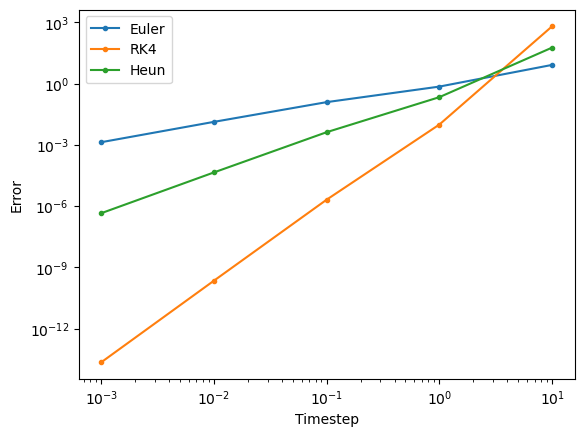

In [1]:
from Helpers.solvers import solve_to
import numpy as np
import matplotlib.pyplot as plt

# Define ODE
fun = lambda t, y: y
fun_analytical = lambda t: np.exp(t)
t0 = 0
y0 = 1
t_max = 1

# -----------------------------------------------------------------------------------------
# COMPARISON OF EFFECT OF STEP SIZE
deltas = [10, 1, 0.1, 0.01, 0.001]
methods = ['Euler', 'RK4', 'Heun']

for method in methods:
    error = []

    for timestep in deltas:
        t_, y_ = solve_to(fun, t0, y0, t_max=t_max, method=method, deltat_max=timestep)
        error.append(np.abs(y_[-1] - fun_analytical(t_max)))

    plt.loglog(deltas, error, '.-', label=method) 

plt.xlabel('Timestep')
plt.ylabel('Error')
plt.legend()
plt.show()

In [2]:
# -----------------------------------------------------------------------------------------
# COMPARISON OF TIME TAKEN FOR SIMILAR ACCURACY

# Find the timestep that gives the same error between the Euler and RK4 methods
baseline = 0.05
t_, y_ = solve_to(fun, t0, y0, t_max=t_max, method='RK4', deltat_max=baseline)
error = np.abs(y_[-1] - fun_analytical(t_max))

euler_error = np.Inf
while euler_error > error:
    print('Time step: {}'.format(baseline))
    print('RK4 error: {}'.format(error))
    print('Euler error: {}'.format(euler_error))
    baseline /= 10
    t_, y_ = solve_to(fun, t0, y0, t_max=t_max, method='Euler', deltat_max=baseline)
    euler_error = np.abs(y_[-1] - fun_analytical(t_max))

print('The timestep that gives the same error between the methods is: {}'.format(baseline))

Time step: 0.05
RK4 error: 1.3580271085444906e-07
Euler error: inf
Time step: 0.005
RK4 error: 1.3580271085444906e-07
Euler error: 0.006764705529672899
Time step: 0.0005
RK4 error: 1.3580271085444906e-07
Euler error: 0.0006792591357549504
Time step: 5e-05
RK4 error: 1.3580271085444906e-07
Euler error: 6.795393089831236e-05
Time step: 5e-06
RK4 error: 1.3580271085444906e-07
Euler error: 6.795679760251971e-06
Time step: 5.000000000000001e-07
RK4 error: 1.3580271085444906e-07
Euler error: 6.794688984790298e-07
The timestep that gives the same error between the methods is: 5.000000000000001e-08


In [3]:
import time

start = time.time()
t_, y_ = solve_to(fun, t0, y0, t_max=t_max, method='Euler', deltat_max=baseline)
end = time.time()
euler_error = np.abs(y_[-1] - fun_analytical(t_max))    
euler_time = end - start

start = time.time()
t_, y_ = solve_to(fun, t0, y0, t_max=t_max, method='RK4', deltat_max=0.05)
end = time.time()
rk4_time = end - start
rk4_error = np.abs(y_[-1] - fun_analytical(t_max))

print('Euler error: {}, time taken: {}'.format(euler_error, euler_time))
print('RK4 error: {}, time taken: {}'.format(rk4_error, rk4_time))

Euler error: 6.841147914826706e-08, time taken: 24.61976456642151
RK4 error: 1.3580271085444906e-07, time taken: 0.02399897575378418


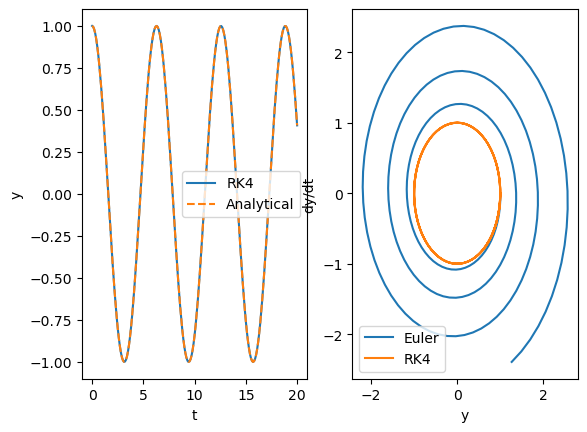

In [4]:
# -----------------------------------------------------------------------------------------
# SYSTEM OF ODES

# Define ODE
# d^2y/dt^2 = -y ==> dy/dt = v, dv/dt = -u
def fun(t, y):
    y_ = y[0]
    x_ = y[1]
    return np.array([x_, -y_])

def fun_analytical(t):
    return np.cos(t)     

t0 = 0
y0 = np.array([1, 0])
t_max = 20
deltat_max = 0.1

# Solve ODE
t_euler, y_euler = solve_to(fun, t0, y0, t_max=t_max, method='Euler', deltat_max=deltat_max)
t_rk4, y_rk4 = solve_to(fun, t0, y0, t_max=t_max, method='RK4', deltat_max=deltat_max)
# t_heun, y_heun = solve_to(fun, t0, y0, t_max=t_max, method='Heun', deltat_max=deltat_max)

# Analytical solution
y_a = fun_analytical(t_rk4)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot results: y vs t
ax1.plot(t_rk4, y_rk4[:, 0], label='RK4')
ax1.plot(t_rk4, y_a, '--', label='Analytical')
ax1.set(xlabel='t', ylabel='y')
ax1.legend()

# # Plot results: y vs y'
ax2.plot(y_euler[:, 0], y_euler[:, 1], label='Euler')
ax2.plot(y_rk4[:, 0], y_rk4[:, 1], label='RK4')
ax2.set(xlabel='y', ylabel='dy/dt')
ax2.legend()
plt.show()
